In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Manhattan

In [2]:
df_man = pd.read_parquet(r"..\data\final_processed\Manhattan - all.parquet.gz")
df_man = df_man.set_index("timestamp_hour")
df_man['txn_date'] = pd.to_datetime(df_man['txn_date'])
df_man = df_man[
    (df_man['txn_date'] >= '2019-02-01') & (df_man['txn_date'] <= '2024-12-31')
]
df_man['txn_month'] = df_man['txn_date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=1))
df_man.head()

,txn_date,txn_hour,num_txns_Yellow Taxi Trip Records,num_txns_For-Hire Vehicle Trip Records,num_txns_Green Taxi Trip Records,num_txns_Uber,num_txns_Lyft,num_txns_Juno,num_txns_Via,total_amount_Yellow Taxi Trip Records,total_amount_For-Hire Vehicle Trip Records,total_amount_Green Taxi Trip Records,total_amount_Uber,total_amount_Lyft,total_amount_Juno,total_amount_Via,txn_month
timestamp_hour,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2019-02-01,0,6347,109,212,12210,5261,1056,0,48891.282940,0.0,2738.758667,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 01:00:00,2019-02-01,1,3694,44,128,7286,3090,646,0,31448.238410,0.0,1749.783333,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 02:00:00,2019-02-01,2,2255,42,76,4610,1988,446,0,22070.332000,0.0,1022.620000,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 03:00:00,2019-02-01,3,1591,28,55,3504,1467,335,0,18566.660682,0.0,934.490000,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 04:00:00,2019-02-01,4,1515,67,64,3666,1638,331,0,19226.280129,0.0,1084.690000,0.0,0.0,0.0,0.0,2019-02-01


### Check if all dates and hours are available

In [3]:
grouped = df_man.groupby('txn_date')['txn_hour'].nunique()
grouped[grouped < 24]

Series([], Name: txn_hour, dtype: int64)

# Time Series EDA

### Hourly trend

<Axes: xlabel='timestamp_hour'>

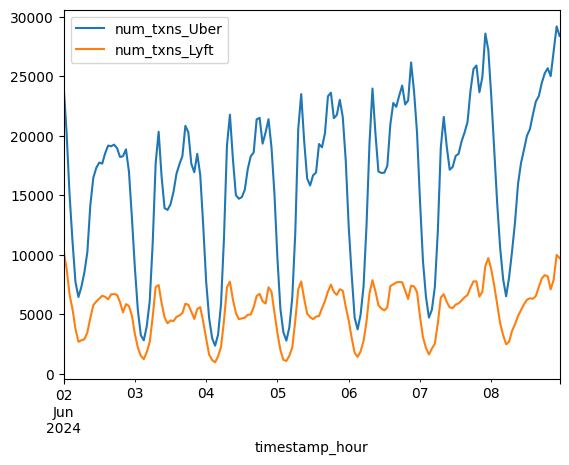

In [4]:
uber_hly_txns = (
    df_man[(df_man['txn_date'] >= '2024-06-02') & (df_man['txn_date'] <= '2024-06-08')]
    [["num_txns_Uber", "num_txns_Lyft"]]
    .groupby("timestamp_hour")
    .sum()
)
uber_hly_txns.plot()

<Axes: xlabel='timestamp_hour'>

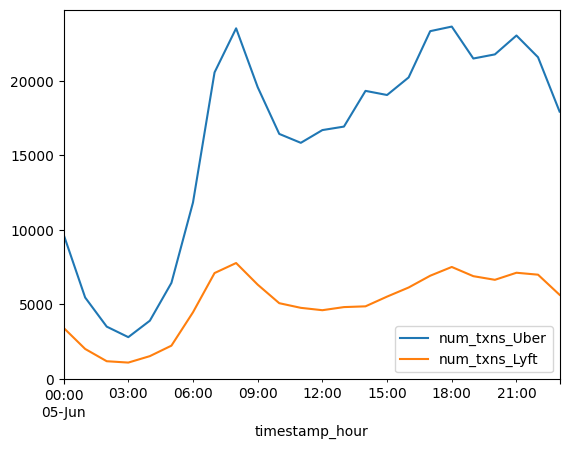

In [5]:
uber_hly_txns_1d = (
    df_man[(df_man['txn_date'] == '2024-06-05')]
    [["num_txns_Uber", "num_txns_Lyft"]]
    .groupby("timestamp_hour")
    .sum()
)
uber_hly_txns_1d.plot()

### Daily trend

<Axes: xlabel='txn_date'>

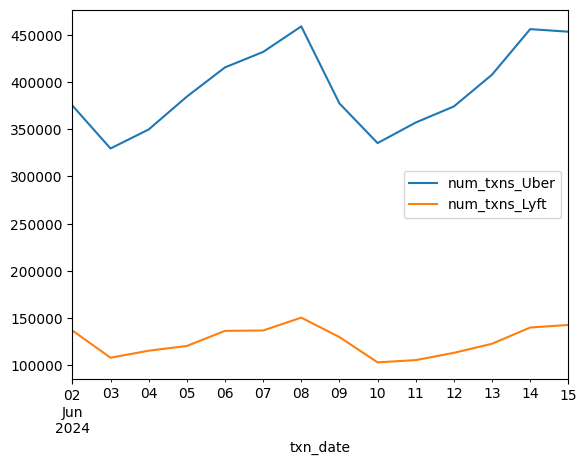

In [6]:
uber_dly_txns = (
    df_man[(df_man['txn_date'] >= '2024-06-02') & (df_man['txn_date'] <= '2024-06-15')]
    [["txn_date", "num_txns_Uber", 
      "num_txns_Lyft"]]
    .groupby("txn_date")
    .sum()
)
uber_dly_txns.plot()

### Monthly trends

<Axes: xlabel='txn_month'>

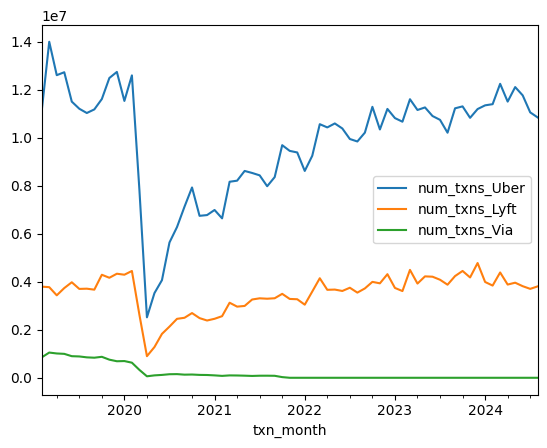

In [7]:
uber_mly_txns = (
    df_man[["txn_month", "num_txns_Uber", 
            "num_txns_Lyft", "num_txns_Via"]]
    .groupby("txn_month")
    .sum()
)
uber_mly_txns.plot()

### ACF and PACF plots

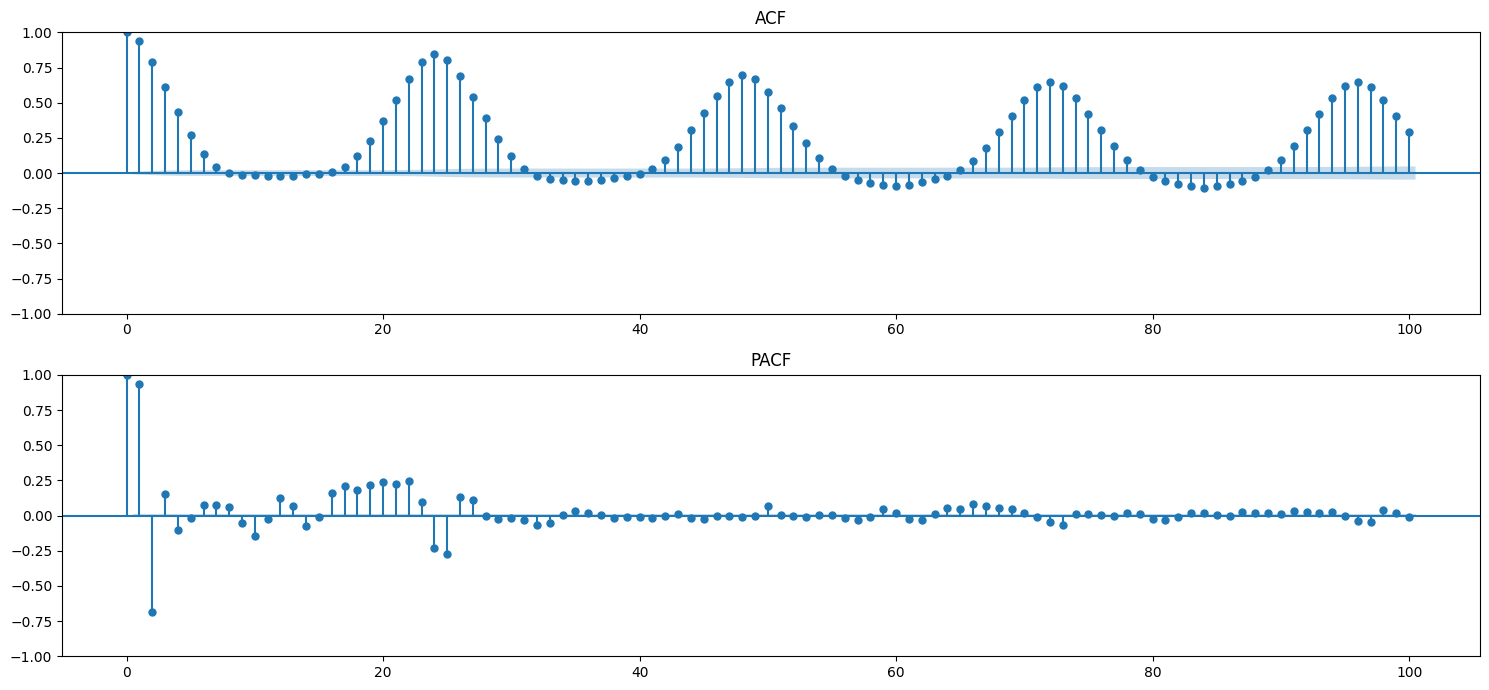

In [8]:
time_series = df_man["num_txns_Uber"]

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

# Autocorrelation (ACF)
plot_acf(time_series, ax=ax[0], lags=100) # Note that the lags are in hours
ax[0].set_title("ACF")

# Partial Autocorrelation (PACF)
plot_pacf(time_series, ax=ax[1], lags=100, method='ywm')
ax[1].set_title("PACF")

fig.tight_layout()

### Time Series Decomposition

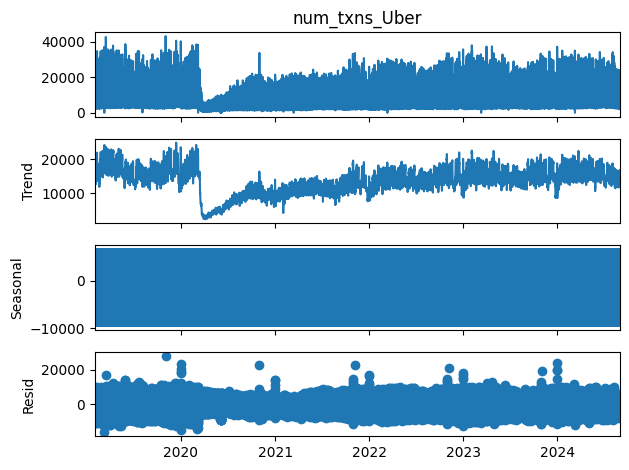

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# STL decomposition
result = seasonal_decompose(time_series, model='additive', period=24)  

# Plot the decomposition
result.plot()
plt.show()

# Geopandas plots (Heatmaps)

# New features

* Holidays
* Day of week
* Month
* Day of month
* Identification of peak hours (6:00-9:00, 17:00-21:00)

### Get month, day, and day of week from the txn_date column 

In [10]:
# Map the weekday names to numbers
day_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
               'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df_man['week_day'] = df_man['txn_date'].dt.day_name().map(day_mapping)

# Month
df_man['month'] = df_man['txn_date'].dt.month

# Day
df_man['day_of_month'] = df_man['txn_date'].dt.day

### Holidays

In [11]:
import holidays

ny_holidays = holidays.US(years=[2020, 2021, 2022, 2023, 2024], state='NY')
df_man['is_holiday'] = df_man['txn_date'].dt.date.isin(ny_holidays).astype(int)

### Peak hours

In [12]:
df_man['peak_hour'] = df_man['txn_hour'].apply(lambda x: 1 if (6 <= x <= 9) or (17 <= x <= 21) else 0)

# Baseline XGBoost model

The training data should be from 2021 to 2024. We keep the last two weeks of August 2024 as the holdout test set. We use RMSE and R-squared evaluation metrics.

In [13]:
df = (
    df_man
    [(df_man['txn_date'] >= '2020-12-31')]
    [["txn_date", "month", "day_of_month", "txn_hour", "week_day",
      "is_holiday", "peak_hour", "num_txns_Uber"]]
)

# Create lagged features for the last 24 hours
for i in range(1, 25):
    df[f'lag_{i}'] = df['num_txns_Uber'].shift(i)

# Training data
df_train = (
    df
    [df['txn_date'] < "2024-08-01"]
    .drop("txn_date", axis=1)
    .dropna()
)
X_train = df_train.drop("num_txns_Uber", axis=1).to_numpy()
y_train = df_train["num_txns_Uber"].to_numpy()

# Holdout data
df_test = (
    df
    [df['txn_date'] >= "2024-08-01"]
    .drop("txn_date", axis=1)
    .dropna()
)
X_test = df_test.drop("num_txns_Uber", axis=1).to_numpy()
y_test = df_test["num_txns_Uber"].to_numpy()

# Feature names
feature_names = df_train.drop("num_txns_Uber", axis=1).columns.to_list()

# XGBoost model with hyperparameter tuning

In [14]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    param = {
        'objective': 'reg:squarederror',
        'n_estimators': 300, # Keep fixed
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True),  # Replaced suggest_loguniform
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Replaced suggest_uniform
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Replaced suggest_uniform
        'gamma': trial.suggest_float('gamma', 0, 1),  # Replaced suggest_uniform
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-1, log=True),  # Replaced suggest_loguniform
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e-1, log=True),  # Replaced suggest_loguniform
        'n_jobs': -1,
        'random_state': 42,
        'verbosity': 0
    }
    
    # Initialize the XGBoost regressor with the suggested hyperparameters
    model = xgb.XGBRegressor(**param)
    
    # Fit the model
    model.fit(X_train, y_train, verbose=False)
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate root mean squared error as the objective to minimize
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse
    
# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Get the best hyperparameters found by Optuna
best_params = study.best_params
print("Best hyperparameters found: ", best_params)

# Train the model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

[I 2024-11-17 14:49:20,884] A new study created in memory with name: no-name-bb47be88-ad4c-43bc-b31a-13798b004e65


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-11-17 14:49:21,481] Trial 0 finished with value: 5585.6648577837295 and parameters: {'learning_rate': 0.0004022516366554929, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.9053732798286487, 'colsample_bytree': 0.831696388358194, 'gamma': 0.5905095601697384, 'reg_alpha': 0.00031593252297065197, 'reg_lambda': 0.03360636077297814}. Best is trial 0 with value: 5585.6648577837295.
[I 2024-11-17 14:49:22,100] Trial 1 finished with value: 5940.996783537242 and parameters: {'learning_rate': 0.00015833275405917295, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7474473811472999, 'colsample_bytree': 0.8883001035897907, 'gamma': 0.5152225308312087, 'reg_alpha': 0.011052462989078735, 'reg_lambda': 0.04497826408724334}. Best is trial 0 with value: 5585.6648577837295.
[I 2024-11-17 14:49:26,458] Trial 2 finished with value: 4605.730977053641 and parameters: {'learning_rate': 0.0010247994691906254, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.9602445889446659, 'colsampl

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9981766148817528, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.3736928031080063,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.053845017325112106,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Train the best model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params, n_estimators = 300, n_jobs = -1)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model using RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 875.7726726787247
R^2: 0.9798675910858127


### Plotting the results

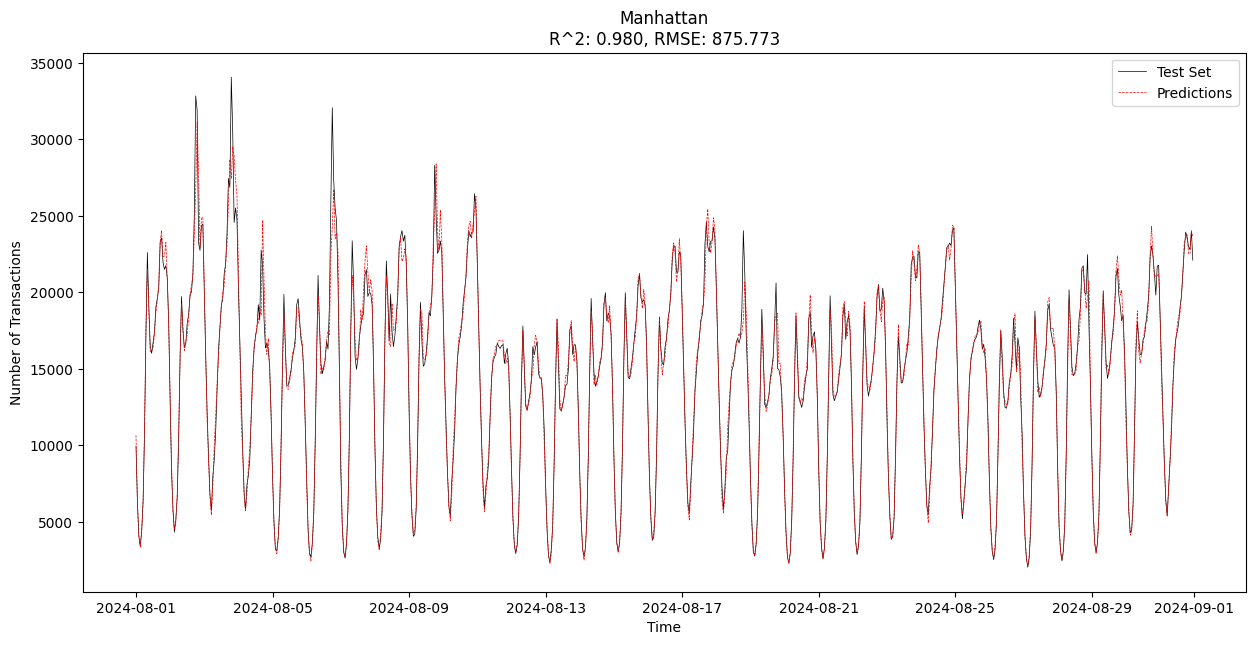

In [16]:
# Make sure y_pred has the same length as df_test["num_txns_Uber"]
fig, ax = plt.subplots(figsize=(15, 7))

# Plotting the Ground Truth data (test set)
ax.plot(df_test.index, df_test["num_txns_Uber"], label="Test Set", color='black', lw=.5)

# Plotting the predictions
ax.plot(df_test.index, y_pred, label="Predictions", ls='--', color='red', lw=.5)

# Adding labels, title, and legend for better clarity
ax.set_xlabel('Time')
ax.set_ylabel('Number of Transactions')
ax.set_title(f'Manhattan\nR^2: {r2:.3f}, RMSE: {rmse:.3f}')
ax.legend()
plt.savefig(r"../data/images/true vs pred.jpeg", dpi=300, bbox_inches='tight')
plt.show()

# Feature importance analysis

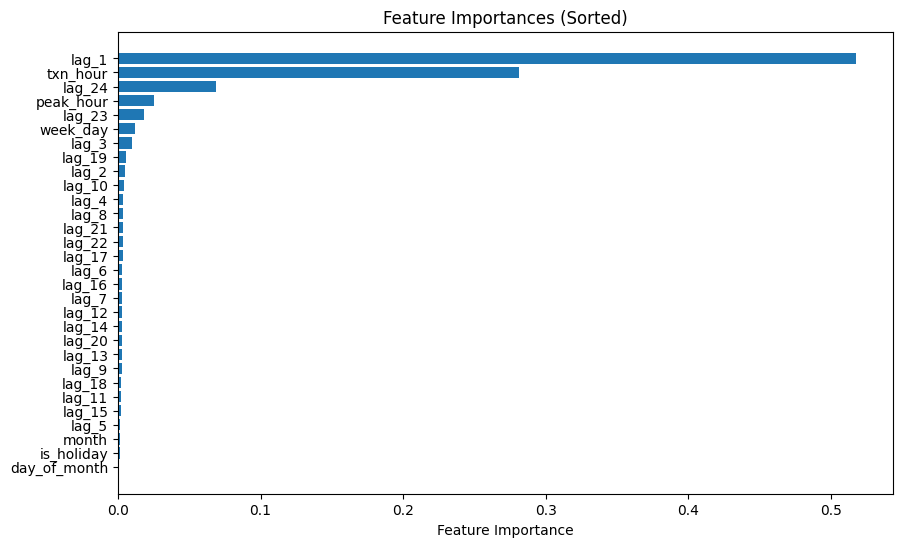

In [17]:
feature_impt = dict(zip(feature_names, best_model.feature_importances_))

# Sort the dictionary by feature importance in descending order
sorted_importance = dict(sorted(feature_impt.items(), 
                                key=lambda item: item[1], reverse=False))

# Extract the feature names and importances for plotting
features = list(sorted_importance.keys())
importances = list(sorted_importance.values())

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Sorted)')
plt.show()

### SHAP

In [ ]:
import shap

# Initialize SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_model, n_jobs=-1)

# Compute SHAP values for the dataset (assuming X_train is your input data)
shap_values = explainer.shap_values(X_train)

# Plot summary of SHAP values (feature importances)
shap.summary_plot(shap_values, X_train, feature_names=feature_names, max_display=10)

[14:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
